<center><h1 style="color:red;font-size:40px">Face Mask Detection using Keras<h1></center>

<h1 style="color:green;">Importing Data Science and Deep Learning Libraries<h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
import cv2
import os

<span style='font-size:20px;font-weight:bold;color:#2415c3'>Taking Input Data</span>

In [2]:
classes=['without_mask','with_mask']
images=[]
labels=[]
for clss in classes:
    path='dataset'+'/'+clss
    for eachfile in os.listdir(path):
        labels.append(clss)
        img = load_img(path+'/'+eachfile, target_size=(150,150))
        img=img_to_array(img)
        if (img is not None):
            images.append(img)
        else:
            print('Image not Valid')
images = np.array(images)
labels=np.array(labels)

In [3]:
print(images.shape)
print(labels.shape)

(1376, 150, 150, 3)
(1376,)


<span style='font-size:20px;font-weight:bold;color:#2415c3'>One Hot Encoding the data as each data is Nominal and has same Priority</span>

In [4]:
labels_matrix=labels.reshape(len(labels),1)
print(labels_matrix.shape)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder',OneHotEncoder(categories='auto'),[0])],remainder='passthrough')
output_value = np.array(ct.fit_transform(labels_matrix))
print(output_value)
print(output_value.shape)

(1376, 1)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
(1376, 2)


<span style='color:red;font-size:25px;font-weight:bold'>Creating a Sequential Model</span>

In [5]:
classifier = Sequential()

<span style='color:red;font-size:18px;font-weight:bold'>Adding Sufficient Layers to Model</span>

In [6]:
classifier.add(Conv2D(64,(3,3),input_shape=(150,150,3),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

In [7]:
classifier.add(Conv2D(128,(3,3),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

In [8]:
classifier.add(Conv2D(256,(3,3),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

In [9]:
classifier.add(Conv2D(512,(3,3),activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

In [10]:
classifier.add(Flatten())

In [11]:
classifier.add(Dense(64,activation='relu'))
classifier.add(Dropout(0.5))

In [12]:
classifier.add(Dense(16,activation='relu'))
classifier.add(Dropout(0.3))

In [13]:
classifier.add(Dense(2,activation='sigmoid'))

In [14]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 512)       1

<h1 style='color:violet'>Train and Test Split of Data</h1>

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(images,output_value,test_size=270/1376,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1106, 150, 150, 3)
(270, 150, 150, 3)
(1106, 2)
(270, 2)


<h2 style='color:orange'> Defining Batch Size and Epochs</h2>

In [17]:
batchsize=128
epoch=15

<h2>Defining a Data generator</h2>

In [18]:
datagen = ImageDataGenerator(rescale=1/255,height_shift_range=0.2,
rotation_range=20,zoom_range=0.15,width_shift_range=0.2)

### Compiling the Model

In [19]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

<h1>Training the Model</h1>

In [20]:
classifier.fit(datagen.flow(X_train,Y_train,batch_size=batchsize),steps_per_epoch=len(X_train)//batchsize,epochs=epoch,
               validation_data=(X_test,Y_test),validation_steps=len(X_test)//batchsize)

  ...
    to  
  ['...']
Train for 8 steps, validate on 270 samples
Epoch 1/15
8/8 [==============================] - 92s 12s/step - loss: 0.6990 - acc: 0.5010 - val_loss: 0.3737 - val_acc: 0.8496
Epoch 2/15
8/8 [==============================] - 81s 10s/step - loss: 0.6745 - acc: 0.5721 - val_loss: 17.6450 - val_acc: 0.6445
Epoch 3/15
8/8 [==============================] - 84s 10s/step - loss: 0.5879 - acc: 0.6544 - val_loss: 20.4394 - val_acc: 0.7090
Epoch 4/15
8/8 [==============================] - 93s 12s/step - loss: 0.5067 - acc: 0.7349 - val_loss: 8.1594 - val_acc: 0.9375
Epoch 5/15
8/8 [==============================] - 72s 9s/step - loss: 0.4461 - acc: 0.7986 - val_loss: 9.3350 - val_acc: 0.9453
Epoch 6/15
8/8 [==============================] - 77s 10s/step - loss: 0.3761 - acc: 0.8308 - val_loss: 11.3542 - val_acc: 0.9570
Epoch 7/15
8/8 [==============================] - 72s 9s/step - loss: 0.3389 - acc: 0.8594 - val_loss: 41.9270 - val_acc: 0.8926
Epoch 8/15
8/8 [===========

In [68]:
classifier.save('model.h5',save_format='h5')

<h3>Accuracy Prediction</h3>

In [185]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test, batch_size=128)
y_pred_label=np.argmax(y_pred,axis=1)
#print(y_pred)
print(y_pred_label)
#print(classification_report(y_pred,Y_test,labels=['With_Mask','Without_Mask']))


[1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0
 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1
 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0
 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1
 0 1 1 0 1 0 0 1 1 1 0]


In [184]:
## Classes of Test Images 
original_out = np.argmax(Y_test,axis=1)
print(original_out)

[1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0
 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1
 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0
 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0
 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0
 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1
 0 1 1 0 1 0 0 1 1 1 0]


In [189]:
print("Confusion_Matrix:\n",confusion_matrix(original_out,y_pred_label))
print((138+125)/(138+125+6+1))
print('Accuracy_Score:',accuracy_score(original_out,y_pred_label))

Confusion_Matrix:
 [[138   1]
 [  6 125]]
0.9740740740740741
Accuracy_Score: 0.9740740740740741


<h3>Report of Accuracy</h3>

In [22]:
y_pred = classifier.predict(X_test, batch_size=batchsize)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred, target_names=classes))

              precision    recall  f1-score   support

without_mask       0.96      0.99      0.98       139
   with_mask       0.99      0.95      0.97       131

    accuracy                           0.97       270
   macro avg       0.98      0.97      0.97       270
weighted avg       0.97      0.97      0.97       270



<h3 style='color:blue'>Defining Labels and Colors for Image Classification ie. Mask or No Mask</h3>

In [72]:
label_dict = {0:'Without_Mask',1:'With_Mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

## Using OpenCv to Classifiy Several Images

**If a person Wears mask then the face with mask is recognised with as green box and the person with no mask is recogised with a red box**

The Decision is made such that whenever we predict an image then the probabilities for both the classes is calculated. If for any class the probability is high then, the particular index for large number is considered using argmax function. If the Index at 0 is high the it detected a person with Mask. If not it detectd a person with no mask

## Testing on Images

In [93]:
def Mask_NoMask(Input_Image_Path,Output_directory):
    cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    size=4
    im=cv2.imread(Input_Image_Path)
    mini=cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))
    faces = cascade.detectMultiScale(mini)
    try:
        for f in faces:
            (x, y, w, h) = [v * size for v in f] #Scale the shapesize backup
            print(x,y,w,h)
        #Save just the rectangle faces in SubRecFaces
            face_img = im[y:y+h, x:x+w]
            resized= cv2.resize(face_img,(150,150))
            print(resized.shape)
            normalized=resized/255.0
            reshaped=np.reshape(normalized,(1,150,150,3))
            reshaped = np.vstack([reshaped])
            result=classifier.predict(reshaped)
            label=result.argmax()
            print(result)
            if(result.argmax()==1):
                print("Person Has Mask:")
            else:
                print("Person Has No Mask")
            cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
            cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
            cv2.putText(im, label_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
            plt.imshow(im)
            cv2.imwrite(Output_directory,im)
        return result
    except:
        return "Problem with the Image"

In [140]:
from IPython.display import Image

Input_Image


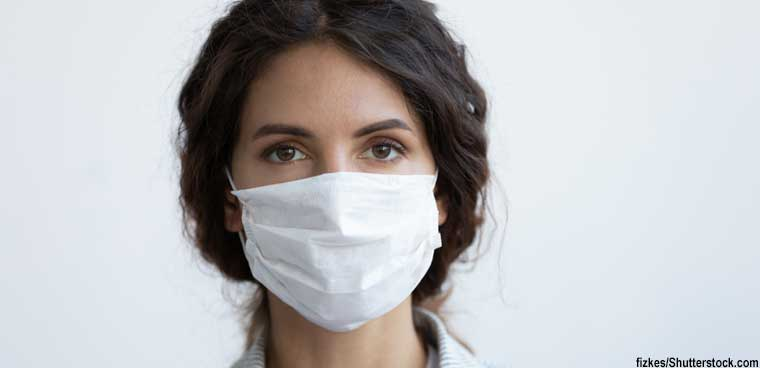

In [141]:
print('Input_Image')
Image('Image_2.jpg',width=400,height=400)

204 52 264 264
(150, 150, 3)
[[0.5017987  0.50276166]]
Person Has Mask:


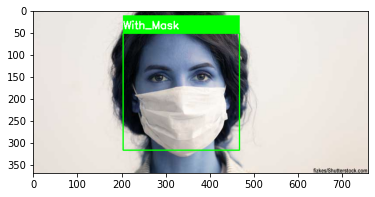

In [139]:
result = Mask_NoMask('Image_2.jpg','Image_2_out.jpg')

Output Image


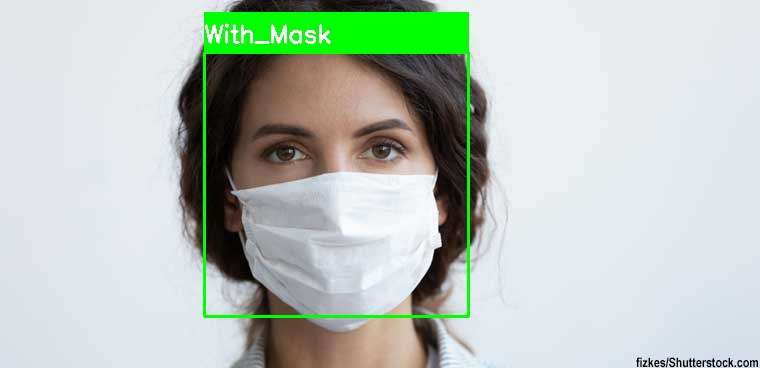

In [142]:
print('Output Image')
Image('Image2_out.jpg',width=400,height=400)

Input Image


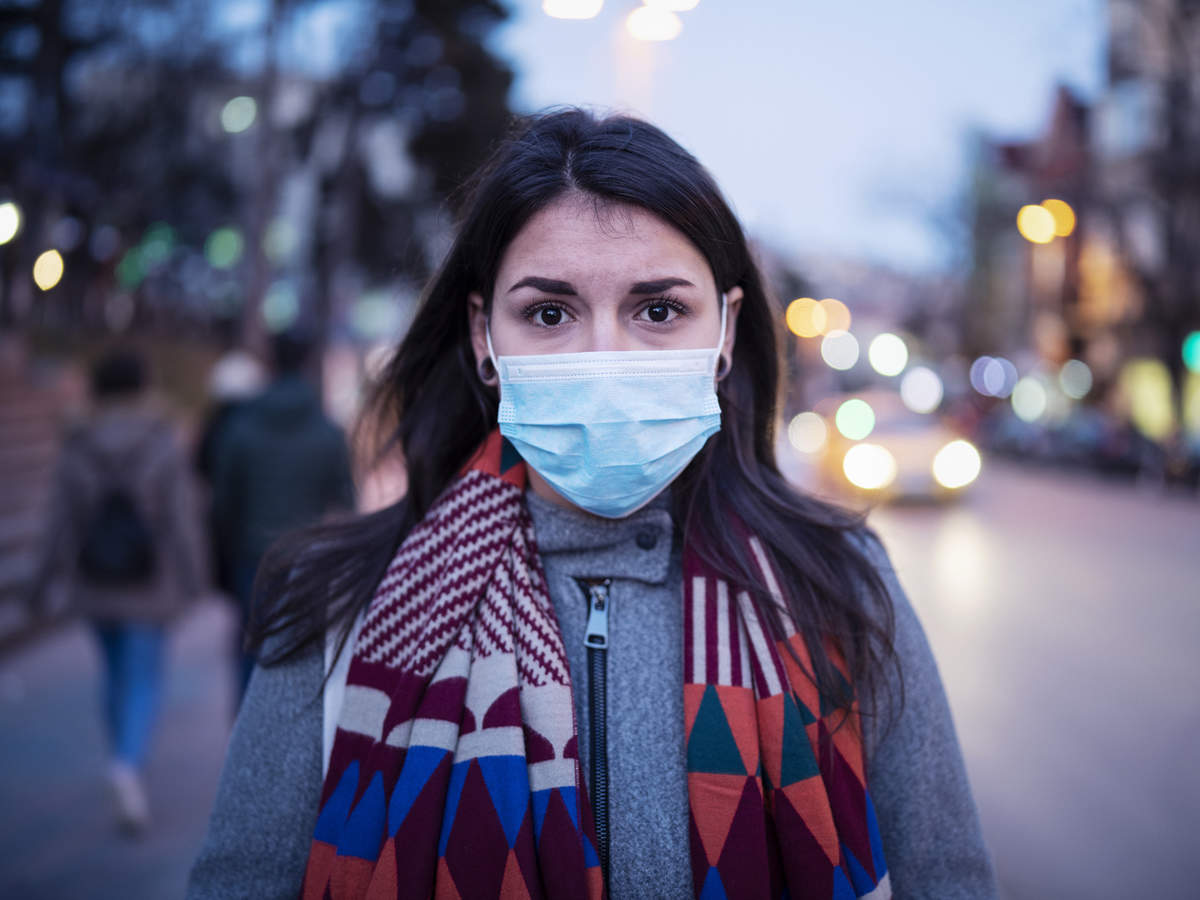

In [143]:
print('Input Image')
Image('Image_8.jpg',width=400,height=400)

452 196 300 300
(150, 150, 3)
[[0.03934377 0.9729974 ]]
Person Has Mask:


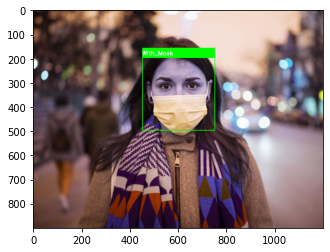

In [98]:
result = Mask_NoMask('Image_8.jpg','Image_8_out.jpg')

Output Image


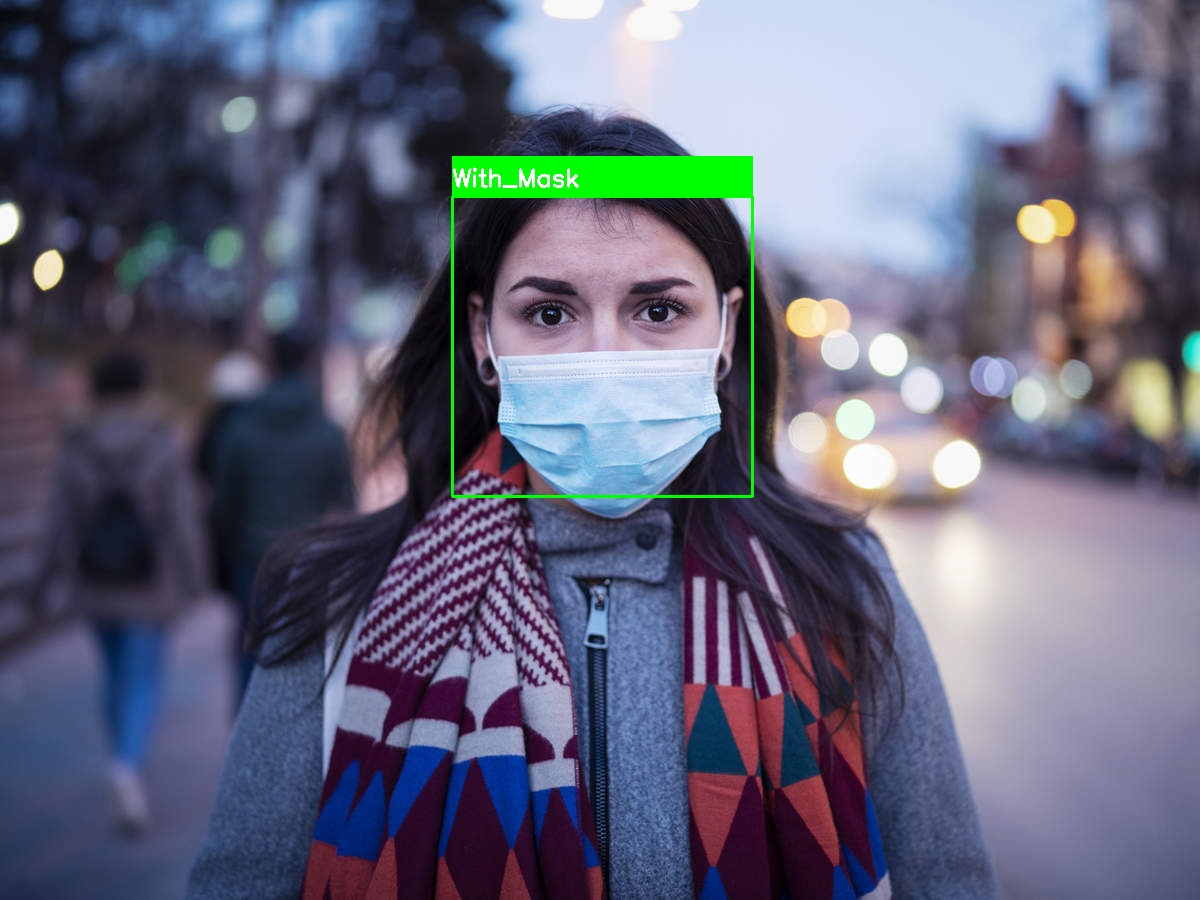

In [146]:
print('Output Image')
Image('Image_8_out.jpg',width=400,height=400)

Input Image


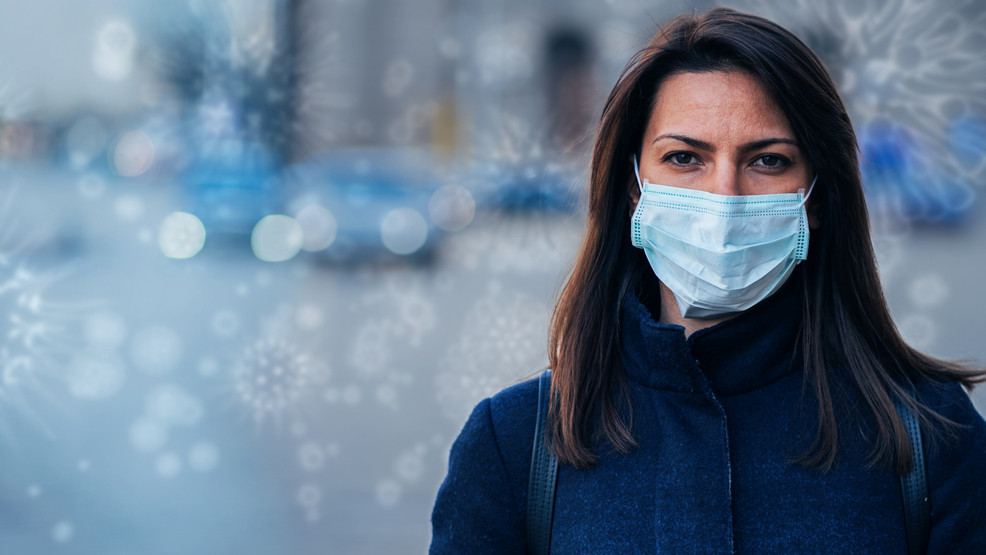

In [147]:
print('Input Image')
Image('Image_7.jpg',width=400,height=400)

608 76 232 232
(150, 150, 3)
[[0.23407117 0.7740642 ]]
Person Has Mask:


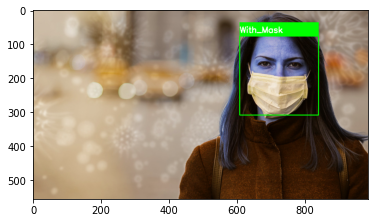

In [148]:
result1 = Mask_NoMask('Image_7.jpg','Image_7_out.jpg')

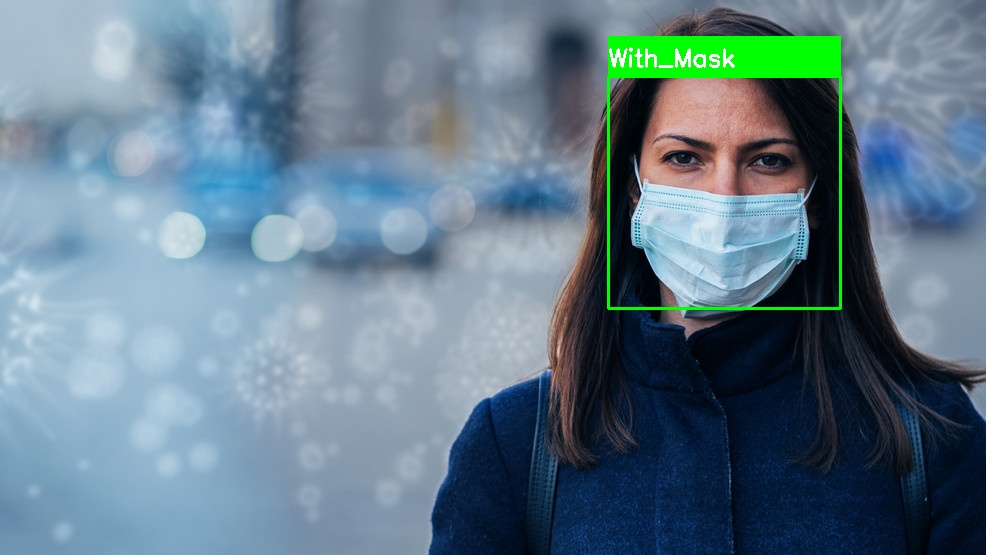

In [149]:
Image('Image_7_out.jpg',width=400,height=400)

Input Image


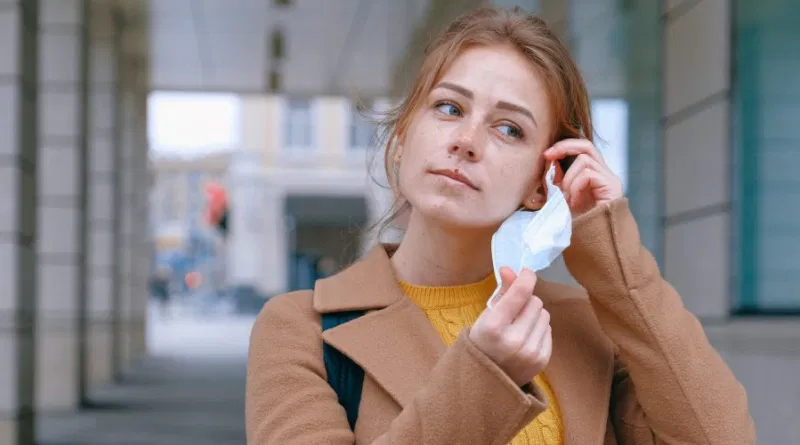

In [150]:
print('Input Image')
Image('Image_9.jpg',width=400,height=400)

376 44 192 192
(150, 150, 3)
[[0.9039767  0.01866886]]
Person Has No Mask


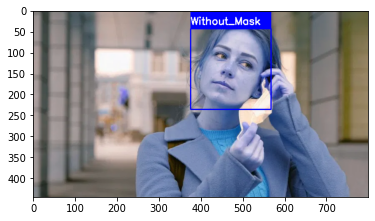

In [151]:
result = Mask_NoMask('Image_9.jpg','Image_9_out.jpg')

Output Image


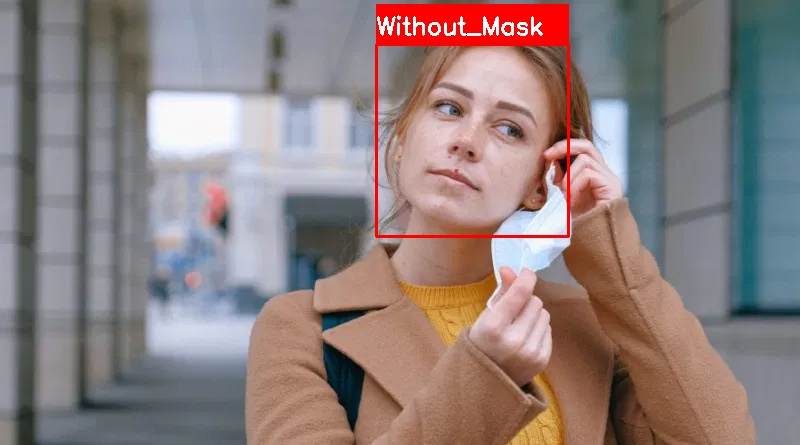

In [153]:
print('Output Image')
Image('Image_9_out.jpg',width=400,height=400)

In [173]:
result = Mask_NoMask('Image_10.jpg','Image_10_out.jpg')
print(result)

Problem with the Image


Input Image


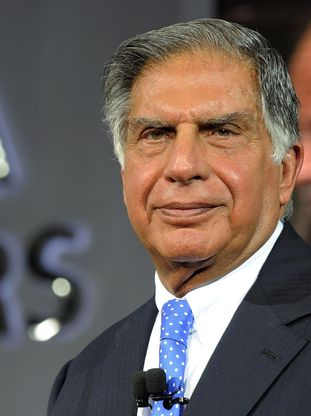

In [160]:
print('Input Image')
Image('Ratan Tata.jpg',width=400,height=400)

84 52 204 204
(150, 150, 3)
[[0.5063608  0.50185055]]
Person Has No Mask
[[0.5063608  0.50185055]]


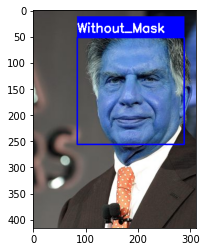

In [161]:
result = Mask_NoMask('Ratan Tata.jpg','Ratan Tata_out.jpg')
print(result)

Output Image


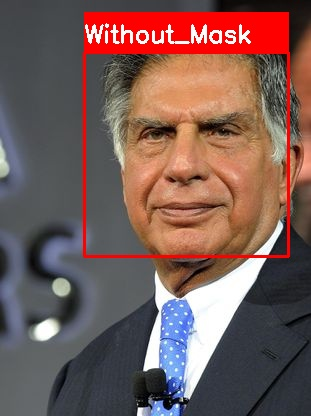

In [162]:
print('Output Image')
Image('Ratan Tata_out.jpg',width=400,height=400)

Input Image


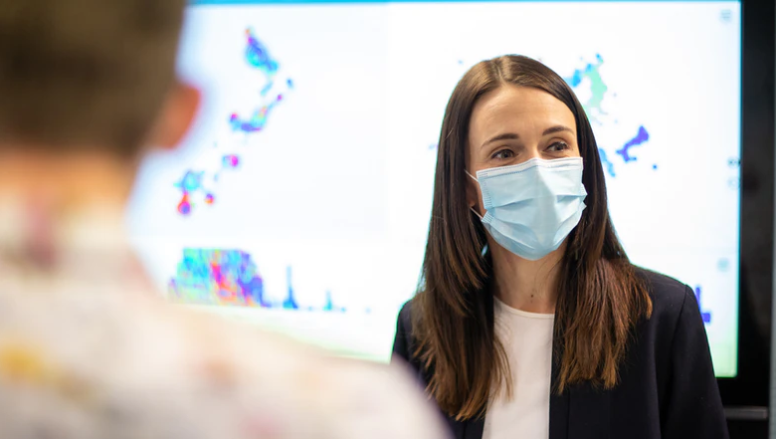

In [163]:
print('Input Image')
Image('Jacinda Ardern_PM.jpg',width=400,height=400)

448 88 164 164
(150, 150, 3)
[[0.09708758 0.920159  ]]
Person Has Mask:
[[0.09708758 0.920159  ]]


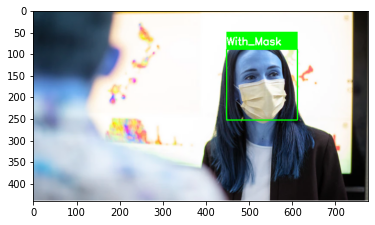

In [132]:
result = Mask_NoMask('Jacinda Ardern_PM.jpg','Jacinda Ardern_PM_out.jpg')
print(result)

Output Image


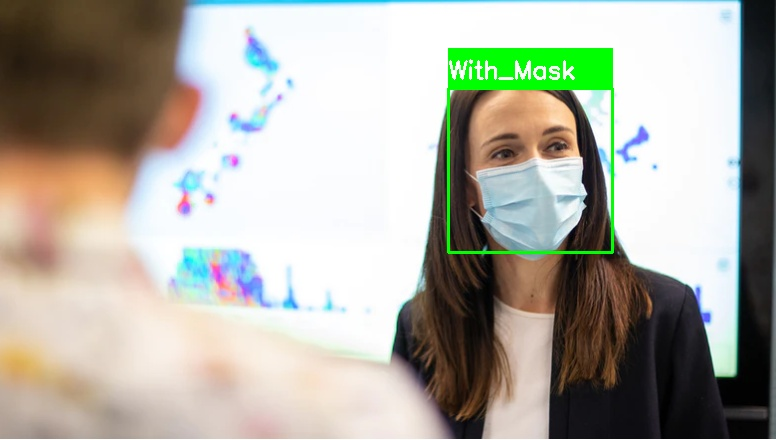

In [166]:
print('Output Image')
Image('Jacinda Ardern_PM_out.jpg',width=400,height=400)

Input Image


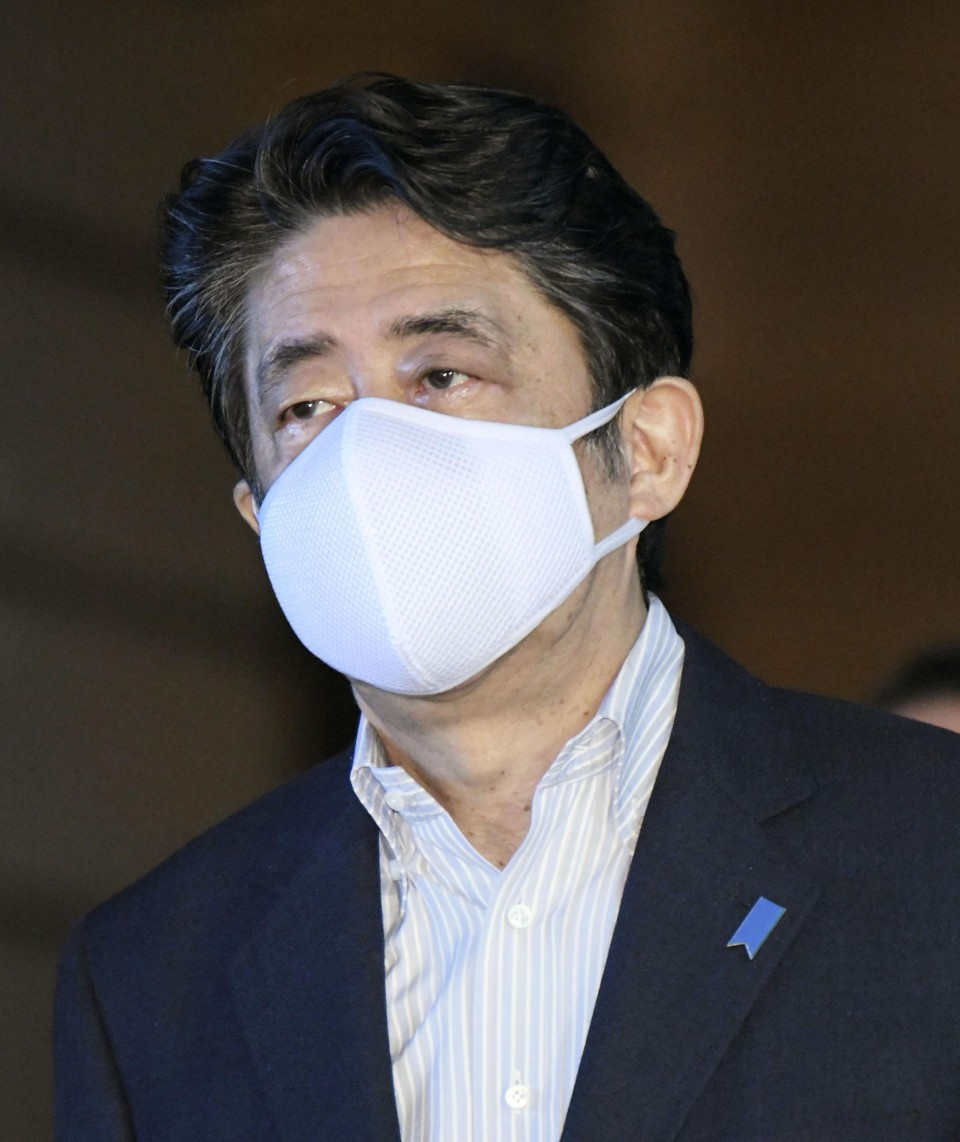

In [167]:
print('Input Image')
Image('Shinzo Abe_PM.jpg',width=400,height=400)

140 192 500 500
(150, 150, 3)
[[0.48771125 0.5307855 ]]
Person Has Mask:
[[0.48771125 0.5307855 ]]


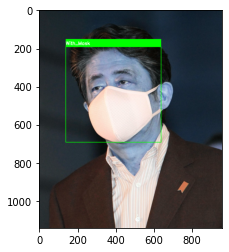

In [136]:
result = Mask_NoMask('Shinzo Abe_PM.jpg','Shinzo Abe_PM_out.jpg')
print(result)

Output Image


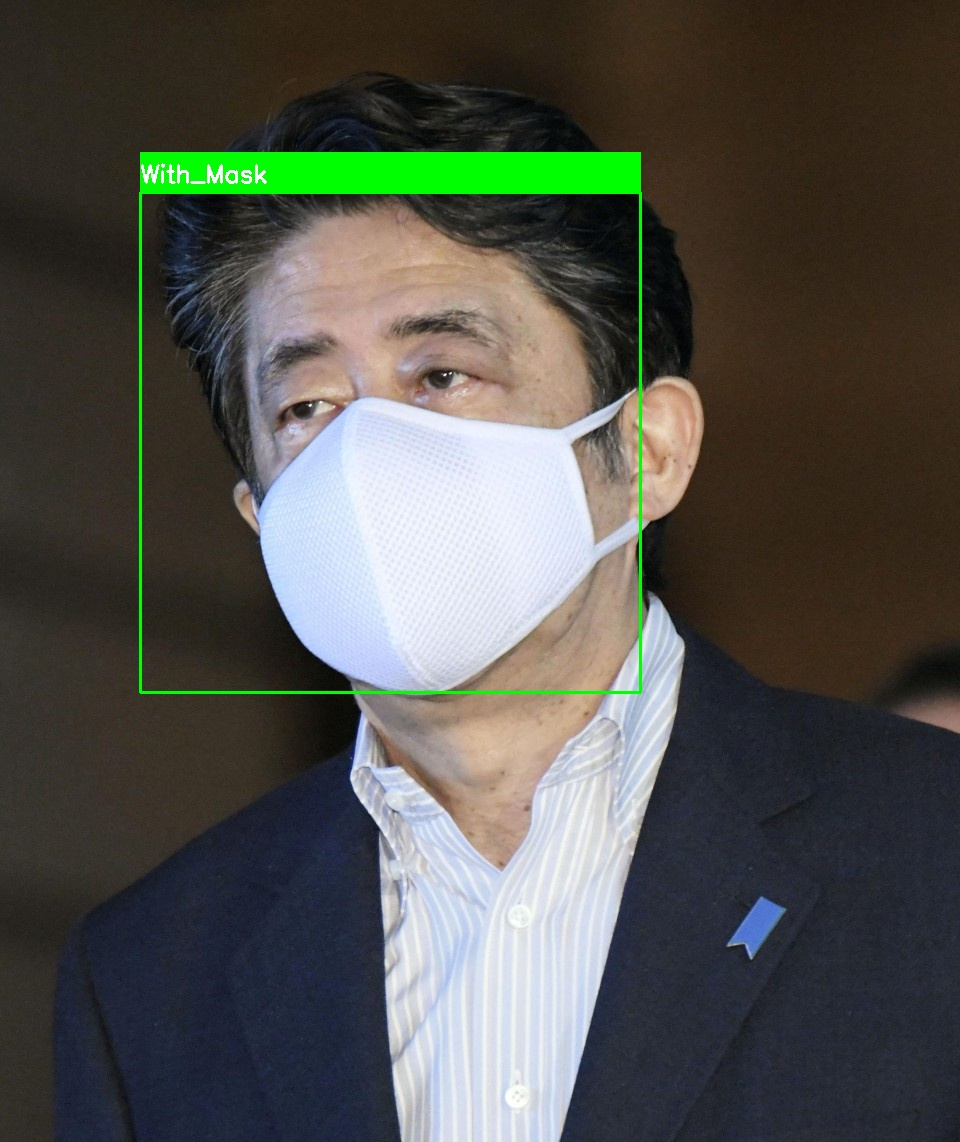

In [168]:
print('Output Image')
Image('Shinzo Abe_PM_out.jpg',width=400,height=400)

Input Image


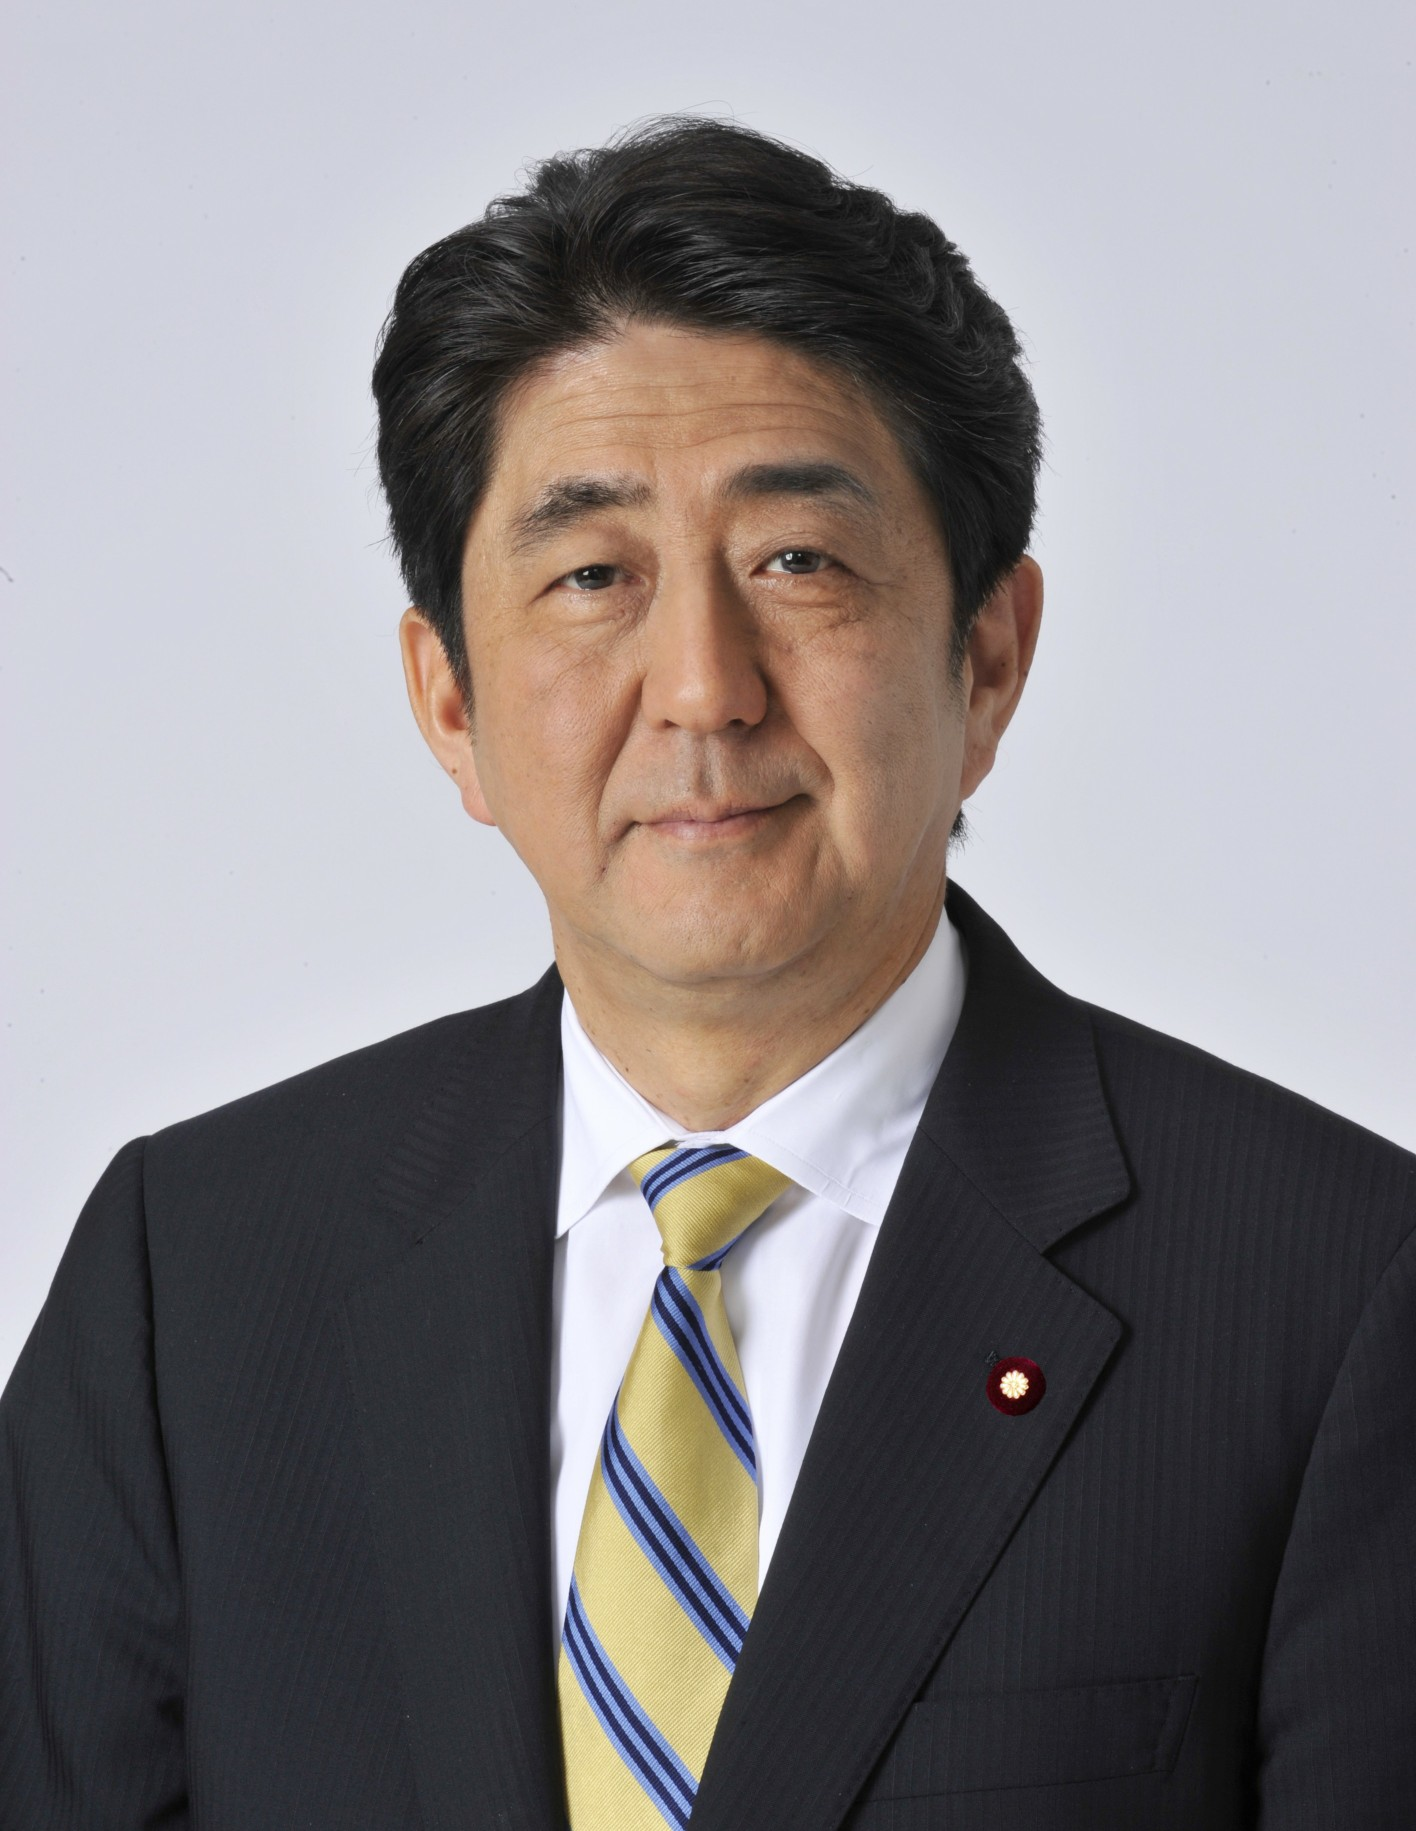

In [170]:
print('Input Image')
Image('Shinzo_Abe_Official.jpg',width=400,height=400)

384 312 624 624
(150, 150, 3)
[[0.52562946 0.46784672]]
Person Has No Mask
[[0.52562946 0.46784672]]


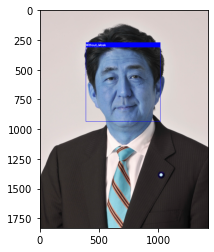

In [171]:
result = Mask_NoMask('Shinzo_Abe_Official.jpg','Shinzo_Abe_Official_out.jpg')
print(result)

Output Image


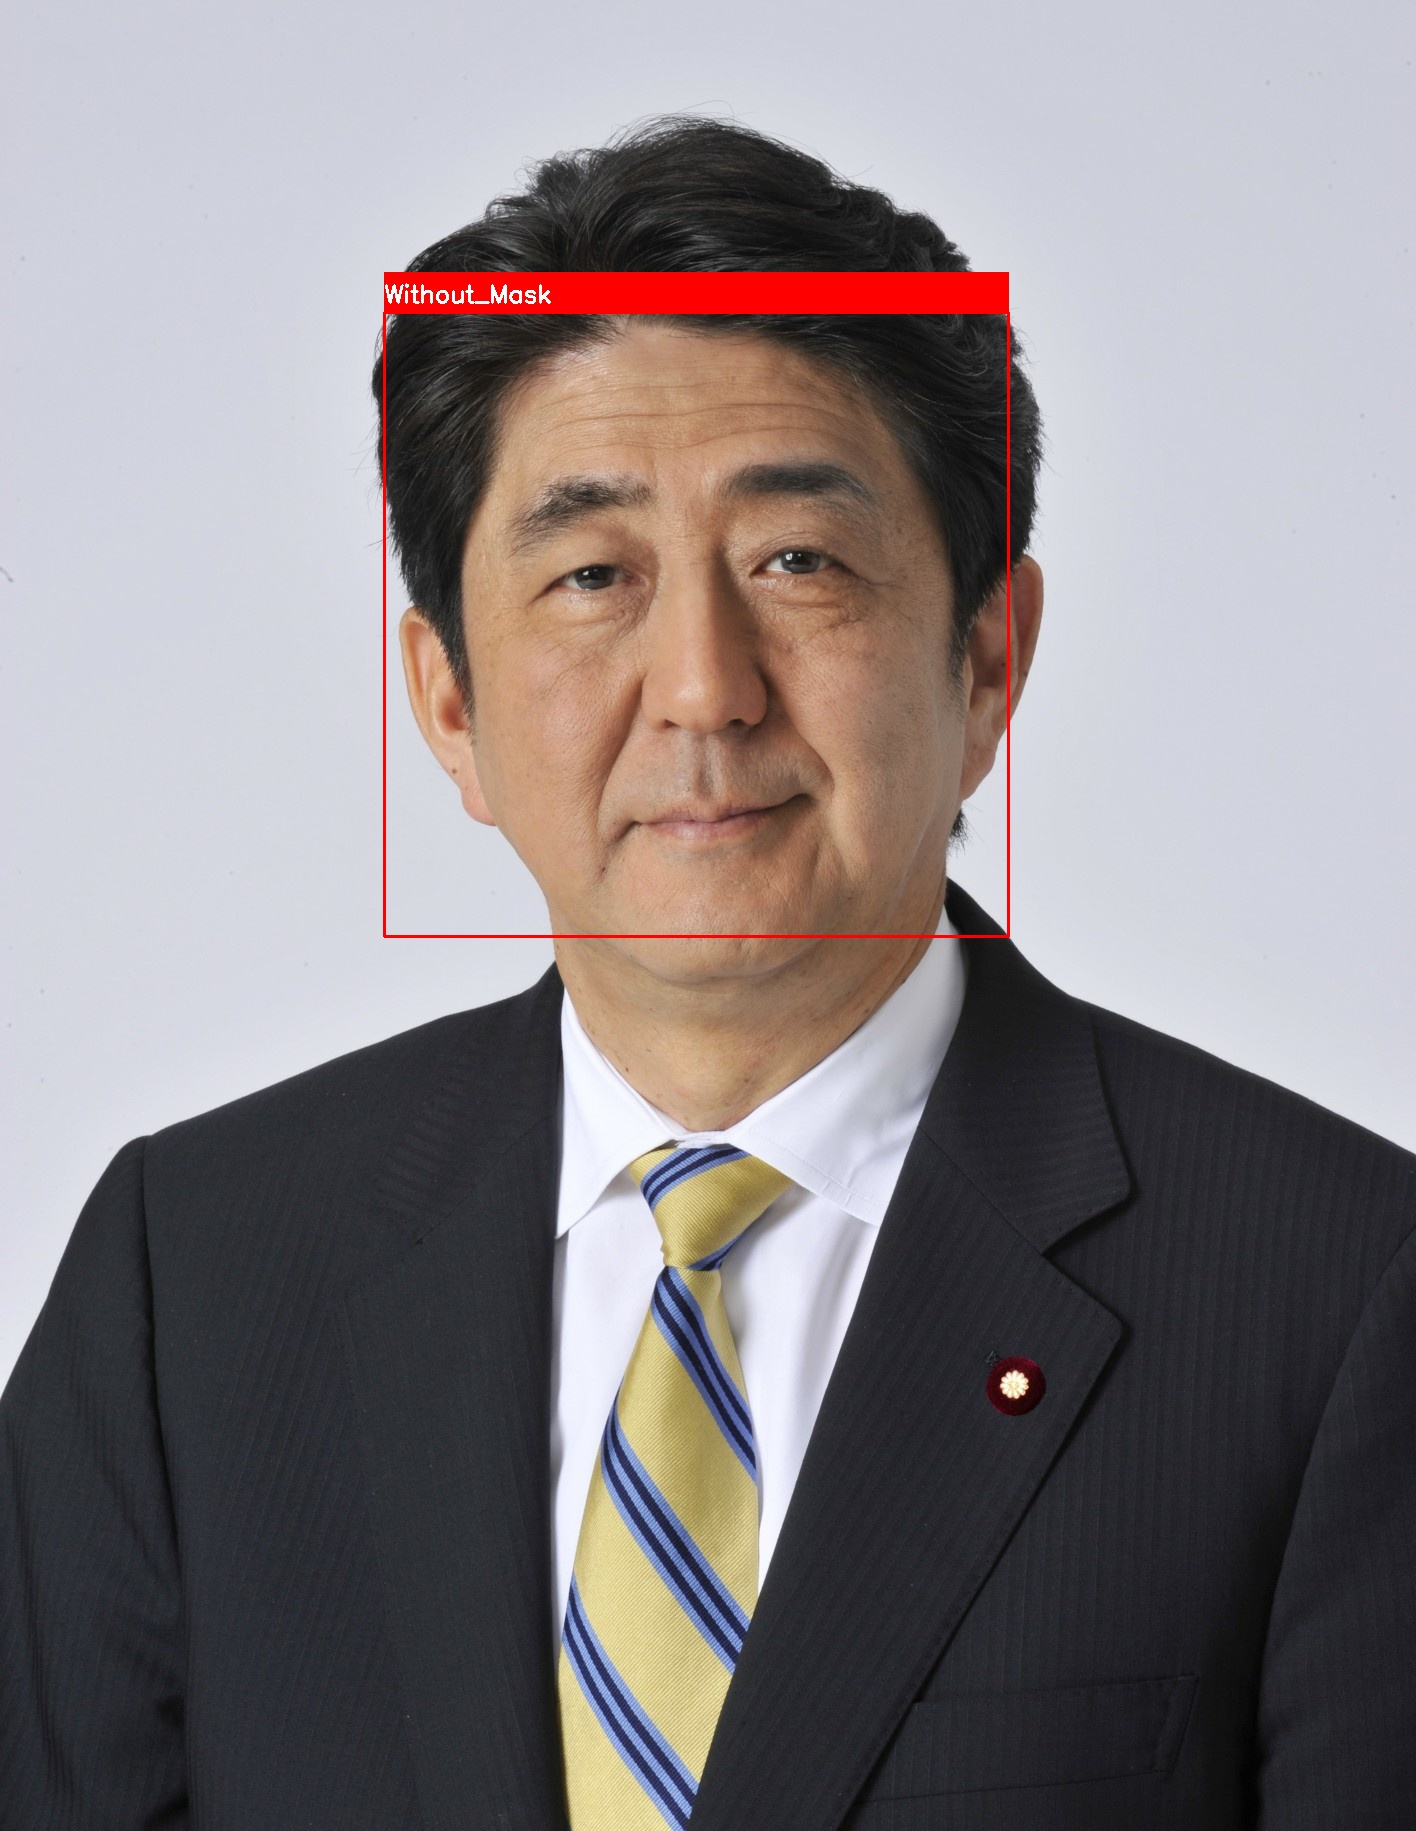

In [172]:
print('Output Image')
Image('Shinzo_Abe_Official_out.jpg',width=400,height=400)